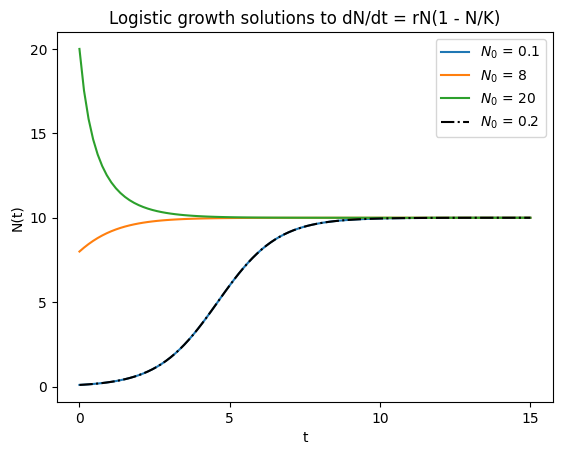

In [1]:
######## This script graphs the solution of the logistic differential equation N' = rN(1 - N/K)
######## Adam Ouzeri - October 2023 ########

######## Imports ########
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

######## Fonction definition ########
# Analytical solution
def logistic(t, N0, params):
    r,K = params
    return N0*K*np.exp(np.dot(r,t))/(K + N0*(np.exp(np.dot(r,t)) -1))

# ODE to solve
def logisticODE(t, N, params):
    r, K = params
    return r*N*(1 - N/K)

######## Simulation parameters ########
N0 = 0.1  # Initial population count
K = 10    # Carrying capacity
r = 1     # Growth rate at low population count
params = r, K
tspan = [0.0, 15.0]
t = np.linspace(tspan[0],tspan[1],100)

######## Solving the ODE ########
sol = solve_ivp(logisticODE, tspan, [N0],  args=(params,), t_eval = t, rtol = 1e-6)

######## Post-processing ########
# Plotting solutions
plt.plot(t,logistic(t,N0,params), label = f'$N_0$ = {N0}')
plt.plot(t,logistic(t,K - 2,params), label = f'$N_0$ = {K - 2}')
plt.plot(t,logistic(t,2*K,params), label = f'$N_0$ = {2*K}')
plt.plot(t, sol.y.T, 'k-.', label = f'$N_0$ = {2*N0}')
plt.xlabel('t')
plt.ylabel('N(t)')
plt.xticks([0, 5, 10, 15])
plt.yticks([0, 5, 10, 15, 20])
plt.title('Logistic growth solutions to dN/dt = rN(1 - N/K)')
plt.legend()
plt.show()
